# Classification et Régression avec Scikit-Learn
Ce notebook illustre la classification avec un arbre de décision et la régression linéaire avec Scikit-Learn.

# Installation des librairies

Avant de commencer, nous devons nous assurer que toutes les bibliothèques nécessaires sont installées. Ces bibliothèques nous permettront de manipuler les données (numpy), de visualiser (matplotlib, seaborn) et d'entraîner des modèles d'apprentissage automatique (scikit-learn).

In [1]:
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/39/04/78d2e7402fb479d893953fb78fa7045f7deb635ec095b6b4f0260223091a/numpy-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 67.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/a7/b2/d872fc3d753516870d520595ddd8ce4dd44fa797a240999f125f58521ad7/matplotlib-3.10.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/ba/99/6794142b90b853a9155316c8f470d2e4821fe6f086b03e372aca848227dd/contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Classification

## Chargement et visualisation du dataset Iris

Nous allons utiliser le dataset Iris, un jeu de données classique en machine learning. 

Il contient trois classes de fleurs 
* Setosa 
* Versicolor
* Virginica

Avec quatre caractéristiques : 

* la longueur
* la largeur des sépales et des pétales. 

Pour simplifier, nous allons utiliser uniquement la longueur et la largeur des sépales.

---

1. **`iris = datasets.load_iris()`**  
   - Cette ligne charge le dataset *Iris* inclus dans `scikit-learn`.  
   - `iris` est un objet de type `Bunch`, similaire à un dictionnaire, contenant les données et les métadonnées du dataset.  
   - Il inclut `iris.data` (les features), `iris.target` (les labels des classes) et `iris.feature_names` (les noms des colonnes).  

2. **`X = iris.data[:, :2]`**  
   - `iris.data` est une matrice NumPy de shape `(150, 4)`, où 150 représente le nombre d’échantillons et 4 le nombre de caractéristiques (longueur/largeur des sépales et pétales).  
   - `[:, :2]` sélectionne uniquement les deux premières colonnes (longueur et largeur des sépales).  
   - `X` devient donc une matrice de shape `(150, 2)`.  

3. **`y = iris.target`**  
   - `iris.target` contient les étiquettes des classes (`0` pour *Setosa*, `1` pour *Versicolor*, `2` pour *Virginica*).  
   - C'est un tableau NumPy de shape `(150,)`, où chaque valeur correspond à la classe d'un échantillon.  

---

* isis: <class 'sklearn.utils._bunch.Bunch'>
* iris.data: `(150, 4)`
* X: `(150, 2)`
* iris.target: `(150,)`
* y: `(150,)`

In [3]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # On prend les deux premières features pour une visualisation plus facile
y = iris.target

Avant d'entraîner un modèle, il est important d'explorer les données. 

Ici, nous affichons un `scatter plot` montrant la distribution des échantillons en fonction de la longueur et de la largeur des sépales. 

Les couleurs indiquent les différentes classes de fleurs.

---

1. **`plt.figure(figsize=(8, 6))`**  
   - Crée une nouvelle figure avec une taille de `8x6` pouces.  
   - Cela permet de contrôler la taille du graphique pour une meilleure lisibilité.  

2. **`sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', edgecolor='k')`**  
   - Utilisation de `seaborn.scatterplot` pour créer un graphique en nuage de points (scatter plot).  
   - **`x=X[:, 0]`** : Les valeurs sur l’axe des abscisses correspondent à la première caractéristique (*Sepal Length*).  
   - **`y=X[:, 1]`** : Les valeurs sur l’axe des ordonnées correspondent à la seconde caractéristique (*Sepal Width*).  
   - **`hue=y`** : La couleur des points est déterminée par la classe (`0`, `1` ou `2`), ce qui permet de visualiser les trois types de fleurs.  
   - **`palette='viridis'`** : Utilise une palette de couleurs pour distinguer les classes.  
   - **`edgecolor='k'`** : Ajoute un contour noir aux points pour les rendre plus visibles.  

3. **`plt.xlabel('Sepal Length')`**  
   - Définit l’étiquette de l’axe des abscisses.  

4. **`plt.ylabel('Sepal Width')`**  
   - Définit l’étiquette de l’axe des ordonnées.  

5. **`plt.title('Visualisation des classes dans le dataset Iris')`**  
   - Ajoute un titre au graphique pour indiquer ce qu'il représente.  

6. **`plt.legend(title='Classe', labels=iris.target_names)`**  
   - Affiche une légende expliquant quelle couleur correspond à quelle classe.  
   - **`title='Classe'`** : Définit un titre pour la légende.  
   - **`labels=iris.target_names`** : Utilise les noms réels des classes (*Setosa*, *Versicolor*, *Virginica*) au lieu des valeurs numériques (`0`, `1`, `2`).  

7. **`plt.show()`**  
   - Affiche le graphique à l’écran.  

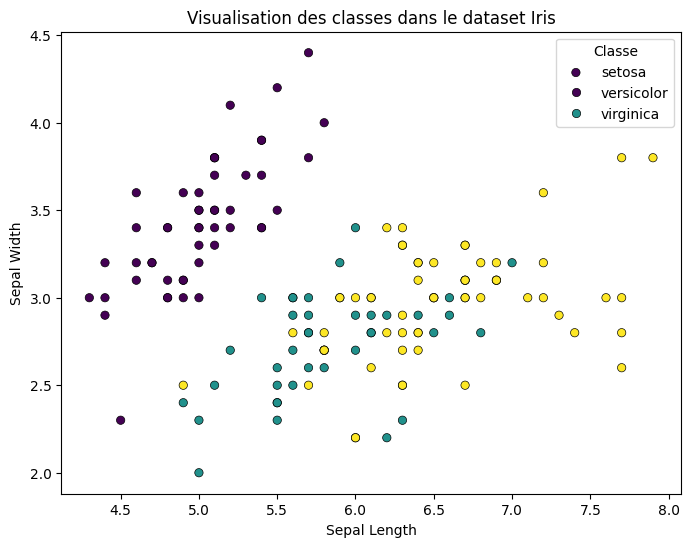

In [4]:
# Visualisation du dataset Iris
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', edgecolor='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Visualisation des classes dans le dataset Iris')
plt.legend(title='Classe', labels=iris.target_names)
plt.show()

## Séparation des données et normalisation

Nous allons diviser les données en un jeu d'entraînement (70%) et un jeu de test (30%). 

Cela permet d'évaluer le modèle sur des données qu'il n'a jamais vues. 

Ensuite, nous normalisons les ``features`` pour que toutes les valeurs soient sur la même échelle, ce qui améliore souvent les performances des modèles.

---

### **Séparation des données en jeu d’entraînement et de test**
1. **`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)`**  
   - **Objectif** : Diviser les données en un jeu d'entraînement (70%) et un jeu de test (30%).  
   - **`X`** : Les caractéristiques (features) des échantillons.  
   - **`y`** : Les étiquettes de classe (0, 1 ou 2).  
   - **`test_size=0.3`** : 30% des données seront utilisées pour tester le modèle.  
   - **`random_state=42`** : Fixe une graine aléatoire pour obtenir toujours la même répartition des données (répétabilité des résultats).  
   - **Résultat** :  
     - `X_train.shape` → `(105, 2)`, contient 105 échantillons pour l'entraînement.  
     - `X_test.shape` → `(45, 2)`, contient 45 échantillons pour le test.  
     - `y_train.shape` → `(105,)`, labels associés aux données d'entraînement.  
     - `y_test.shape` → `(45,)`, labels associés aux données de test.  

---

### **Standardisation des données**
2. **`scaler = StandardScaler()`**  
   - Initialise un standardiseur (`StandardScaler` de `scikit-learn`).  
   - La standardisation permet de centrer les données autour de 0 avec un écart-type de 1.  
   - Cela est souvent recommandé pour améliorer la performance des modèles, surtout ceux sensibles à l’échelle des variables.  

3. **`X_train = scaler.fit_transform(X_train)`**  
   - **`fit_transform()`** :  
     - **`fit`** : Calcule la moyenne et l’écart-type des données d'entraînement.  
     - **`transform`** : Applique la transformation :  
       \[
       X_{\text{scaled}} = \frac{X - \mu}{\sigma}
       \]
     où \( \mu \) est la moyenne et \( \sigma \) l’écart-type de chaque feature.  

4. **`X_test = scaler.transform(X_test)`**  
   - **Important** : On applique uniquement `transform()` (sans `fit`) sur les données de test.  
   - Cela garantit que le modèle utilise la même normalisation que celle calculée sur les données d'entraînement.  
   - Si on utilisait `fit_transform()`, la moyenne et l’écart-type seraient recalculés sur `X_test`, ce qui biaiserait les résultats.  

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
X_train.shape

(105, 2)

In [7]:
X_test.shape

(45, 2)

In [8]:
y_train.shape

(105,)

In [9]:
y_test.shape

(45,)

## Entraînement et visualisation d'un arbre de décision

Nous entraînons un arbre de décision pour classer les fleurs en fonction de leurs caractéristiques. 

L'hyperparamètre ``max_depth=3`` limite la profondeur de l'arbre, évitant un sur-apprentissage sur les données d'entraînement.

Ajoute cette explication avant la cellule contenant ce code :

---

### **Entraînement du modèle de classification avec un arbre de décision**
1. **`dtree = DecisionTreeClassifier(max_depth=3)`**  
   - Crée un modèle d’arbre de décision (`DecisionTreeClassifier`) de `scikit-learn`.  
   - **`max_depth=3`** : Limite la profondeur de l’arbre à 3 niveaux.  
     - Cela évite que l’arbre ne devienne trop complexe et ne mémorise trop les données d’entraînement (*overfitting*).  
     - Un arbre trop profond risque d’être très performant sur les données d’entraînement, mais mauvais sur les nouvelles données.  

2. **`dtree.fit(X_train, y_train)`**  
   - Entraîne l’arbre de décision sur les données d’entraînement (`X_train`, `y_train`).  
   - L’algorithme choisit les meilleurs seuils de séparation pour chaque feature afin de diviser les données en classes.  
   - L’arbre apprend à reconnaître les schémas qui permettent de différencier les fleurs du dataset Iris.  

In [10]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

### **Évaluation du modèle**
3. **`accuracy_dtree = dtree.score(X_test, y_test)`**  
   - Évalue la précision (*accuracy*) du modèle sur les données de test.  
   - **Fonctionnement de `score(X, y)` :**  
     - Calcule le pourcentage de prédictions correctes par rapport aux vraies classes.  
     - \[
       \text{Accuracy} = \frac{\text{Nombre de prédictions correctes}}{\text{Nombre total d’échantillons}}
       \]  
   - **Exemple** : Si le modèle classe correctement 34 échantillons sur 45, l'accuracy sera `34/45 ≈ 0.76` (76%).  

4. **`print(f'Decision Tree Accuracy: {accuracy_dtree:.2f}')`**  
   - Affiche la précision du modèle avec 2 décimales (`:.2f`).  
   - Exemple de sortie :  
     ```
     Decision Tree Accuracy: 0.78
     ```  
   - Une accuracy proche de 1.0 indique un bon modèle, mais si elle est trop élevée sur les données d’entraînement et faible sur les tests, cela peut signaler un *overfitting*.  

In [11]:
accuracy_dtree = dtree.score(X_test, y_test)
print(f'Decision Tree Accuracy: {accuracy_dtree:.2f}')

Decision Tree Accuracy: 0.78


In [12]:
type(accuracy_dtree)

float

L'arbre de décision peut être représenté graphiquement. 

Chaque nœud correspond à une décision basée sur une caractéristique, et les feuilles indiquent la classe prédite.

---

### **Visualisation de l'arbre de décision**
1. **`plt.figure(figsize=(12, 8))`**  
   - Crée une figure avec une taille de `12x8` pouces pour afficher l’arbre de décision de manière lisible.  

2. **`plot_tree(dtree, filled=True, feature_names=['Sepal Length', 'Sepal Width'], class_names=iris.target_names, rounded=True, fontsize=8)`**  
   - **`plot_tree(dtree)`** : Génère un diagramme représentant l’arbre de décision entraîné (`dtree`).  
   - **`filled=True`** : Remplit les nœuds avec une couleur indiquant la classe prédominante.  
     - Plus la couleur est intense, plus la classe est prédominante dans cette région de l’arbre.  
   - **`feature_names=['Sepal Length', 'Sepal Width']`** : Nomme les axes de séparation avec les caractéristiques utilisées.  
   - **`class_names=iris.target_names`** : Associe les numéros des classes (`0`, `1`, `2`) aux noms des fleurs (*Setosa*, *Versicolor*, *Virginica*).  
   - **`rounded=True`** : Arrondit les bords des nœuds pour un affichage plus clair.  
   - **`fontsize=8`** : Définit la taille de la police pour améliorer la lisibilité du texte dans l’arbre.  

3. **`plt.title("Visualisation de l'Arbre de Décision")`**  
   - Ajoute un titre au graphique pour contextualiser la visualisation.  

4. **`plt.show()`**  
   - Affiche l’arbre de décision.  

---

### **Interprétation du graphique**
- Chaque **nœud** de l’arbre représente une décision basée sur une caractéristique.  
- La **condition affichée** (ex : `Sepal Length <= 5.45`) montre comment les données sont séparées à ce niveau.  
- Chaque **feuille** correspond à une classe prédite.  
- L’**intensité de la couleur** reflète la pureté du nœud (si toutes les données appartiennent à une seule classe, la couleur est plus intense).  

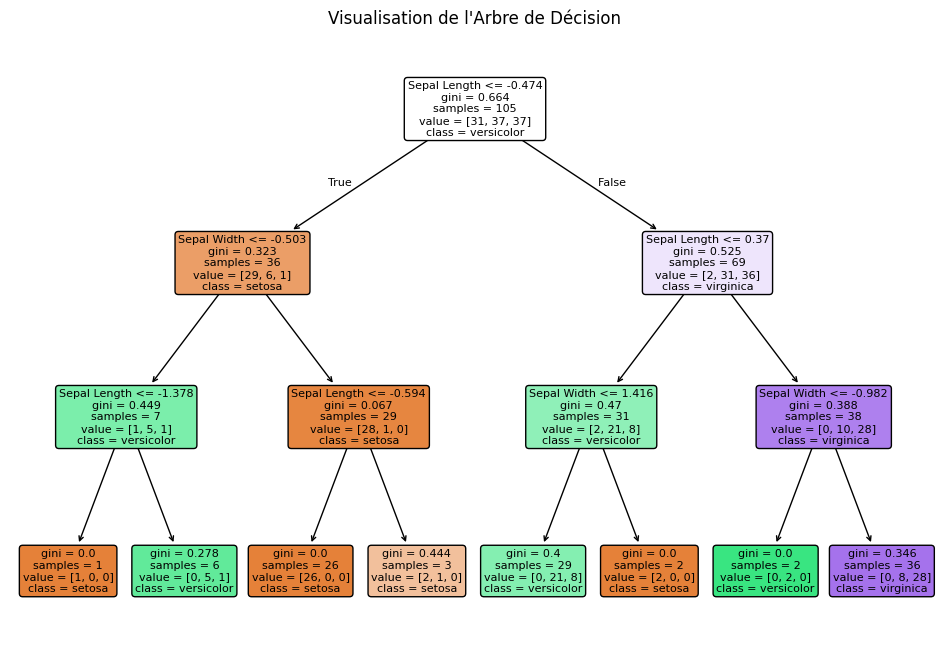

In [13]:
# Visualisation de l'arbre de décision
plt.figure(figsize=(12, 8))
plot_tree(dtree, filled=True, feature_names=['Sepal Length', 'Sepal Width'], class_names=iris.target_names, rounded=True, fontsize=8)
plt.title("Visualisation de l'Arbre de Décision")
plt.show()

## Extraction des règles de l'arbre de décision

Nous pouvons également afficher les règles de décision de l'arbre sous forme de texte. 

Ces règles montrent comment le modèle prend ses décisions pour classer un échantillon.

---

### **Extraction des règles de l'arbre de décision**
1. **`tree_rules = export_text(dtree, feature_names=['Sepal Length', 'Sepal Width'])`**  
   - **Objectif** : Extraire les règles de l’arbre sous forme de texte lisible.  
   - **`export_text(dtree)`** : Convertit l’arbre de décision en une série de règles conditionnelles.  
   - **`feature_names=['Sepal Length', 'Sepal Width']`** : Remplace les indices des colonnes par les noms des caractéristiques utilisées pour la classification.  

   **Exemple de sortie :**  
   ```
   |--- Sepal Length <= 5.45
   |   |--- Sepal Width <= 2.75
   |   |   |--- class: Versicolor
   |   |--- Sepal Width >  2.75
   |   |   |--- class: Setosa
   |--- Sepal Length >  5.45
   |   |--- class: Virginica
   ```

   - Chaque **nœud** représente une décision.  
   - Chaque **feuille** (`class: X`) correspond à une classification finale.  
   - Les **indentations** représentent la profondeur dans l’arbre.  

2. **`print('Règles de l\'Arbre de Décision:\n', tree_rules)`**  
   - Affiche les règles extraites de l’arbre.  
   - `\n` permet d’ajouter un retour à la ligne pour une meilleure lisibilité.  

---

### **Pourquoi extraire les règles ?**
- Permet de **comprendre comment l’algorithme prend ses décisions**.  
- Aide à **interpréter le modèle**, notamment pour vérifier s’il prend en compte les bons critères.  
- Utile en **explicabilité de l’IA**, surtout dans des domaines où les décisions doivent être justifiées.  

In [14]:
tree_rules = export_text(dtree, feature_names=['Sepal Length', 'Sepal Width'])
print('Règles de l\'Arbre de Décision:\n', tree_rules)

Règles de l'Arbre de Décision:
 |--- Sepal Length <= -0.47
|   |--- Sepal Width <= -0.50
|   |   |--- Sepal Length <= -1.38
|   |   |   |--- class: 0
|   |   |--- Sepal Length >  -1.38
|   |   |   |--- class: 1
|   |--- Sepal Width >  -0.50
|   |   |--- Sepal Length <= -0.59
|   |   |   |--- class: 0
|   |   |--- Sepal Length >  -0.59
|   |   |   |--- class: 0
|--- Sepal Length >  -0.47
|   |--- Sepal Length <= 0.37
|   |   |--- Sepal Width <= 1.42
|   |   |   |--- class: 1
|   |   |--- Sepal Width >  1.42
|   |   |   |--- class: 0
|   |--- Sepal Length >  0.37
|   |   |--- Sepal Width <= -0.98
|   |   |   |--- class: 1
|   |   |--- Sepal Width >  -0.98
|   |   |   |--- class: 2



In [15]:
type(tree_rules)

str

## Prédiction sur de nouveaux échantillons

Nous testons notre modèle sur de nouveaux échantillons, dont nous connaissons la longueur et la largeur des sépales, pour voir quelle classe il prédit.

Ajoute cette explication avant la cellule contenant ce code :

### **Prédiction sur de nouveaux échantillons**  

1. **`new_samples = np.array([[5.1, 3.5], [6.2, 2.9], [7.3, 2.8]])`**  
   - Définit un tableau NumPy contenant trois nouveaux échantillons.  
   - Chaque échantillon est défini par deux caractéristiques :  
     - **Première colonne** → Longueur du sépale (*Sepal Length*).  
     - **Deuxième colonne** → Largeur du sépale (*Sepal Width*).  
   - **Shape du tableau** : `(3, 2)` → 3 échantillons avec 2 features chacun.  

   **Exemple des nouvelles données :**  
   | Sepal Length | Sepal Width |  
   |-------------|-------------|  
   | 5.1         | 3.5         |  
   | 6.2         | 2.9         |  
   | 7.3         | 2.8         |  

---

2. **`predicted_classes = dtree.predict(new_samples)`**  
   - Utilise l’arbre de décision (`dtree`) pour prédire la classe de chaque échantillon.  
   - **Fonctionnement** :  
     - Chaque échantillon est passé dans l’arbre de décision, qui suit ses règles pour aboutir à une classification.  
   - **Résultat** :  
     - `predicted_classes` est un tableau contenant les labels (`0`, `1` ou `2`) correspondant aux classes prédites.  
   - **Shape du tableau** : `(3,)`, car il contient une seule valeur (classe prédite) par échantillon.  

---

3. **`print(f'Classes prédites pour les nouveaux échantillons: {predicted_classes}')`**  
   - Affiche les classes prédites sous forme de texte.  
   - **Exemple de sortie :**  
     ```
     Classes prédites pour les nouveaux échantillons: [0 2 2]
     ```
   - **Interprétation** :  
     - Le premier échantillon (`[5.1, 3.5]`) est classé comme `0` (*Setosa*).  
     - Les deux autres (`[6.2, 2.9]` et `[7.3, 2.8]`) sont classés comme `2` (*Virginica*).  

---

### **Pourquoi tester sur de nouveaux échantillons ?**
- Vérifie si le modèle peut **généraliser** à des données qu’il n’a pas vues lors de l'entraînement.  
- Permet d’obtenir **des prédictions en conditions réelles**, en dehors du dataset d'origine.  

In [16]:
new_samples = np.array([[5.1, 3.5], [6.2, 2.9], [7.3, 2.8]])
predicted_classes = dtree.predict(new_samples)
print(f'Classes prédites pour les nouveaux échantillons: {predicted_classes}')

Classes prédites pour les nouveaux échantillons: [2 2 2]


In [17]:
new_samples.shape

(3, 2)

In [18]:
predicted_classes.shape

(3,)

# Régression linéaire

## Régression linéaire avec le dataset Diabetes

Passons maintenant à la régression avec le dataset Diabetes. 

Ce jeu de données contient des mesures médicales et un score indiquant la progression de la maladie. 

Nous allons utiliser une seule variable (``feature 2``) pour prédire ce score.

Ajoute cette explication avant la cellule contenant ce code :

---

### **Chargement du dataset Diabetes et sélection d’une feature**  

1. **`diabetes = datasets.load_diabetes()`**  
   - Charge le dataset *Diabetes* inclus dans `scikit-learn`.  
   - Ce dataset est utilisé pour des tâches de **régression**, car la variable cible est une valeur continue (progression de la maladie).  
   - `diabetes` est un objet de type `Bunch`, similaire à un dictionnaire, contenant :  
     - `diabetes.data` : Matrice des caractéristiques (*features*).  
     - `diabetes.target` : Vecteur des valeurs cibles (*target*).  
     - `diabetes.feature_names` : Liste des noms des features.  

---

2. **`X = diabetes['data']`**  
   - Extrait les **caractéristiques** des patients.  
   - `X` est une matrice NumPy de **shape `(442, 10)`**, où :  
     - 442 → Nombre d’échantillons (patients).  
     - 10 → Nombre de caractéristiques (ex : IMC, pression sanguine, taux de glucose, etc.).  

   **Exemple des features dans `X` :**  
   | Age | Sex | BMI | BP | S1 | S2 | S3 | S4 | S5 | S6 |  
   |-----|-----|-----|----|----|----|----|----|----|----|  

---

3. **`y = diabetes['target']`**  
   - Extrait la **variable cible** (progression de la maladie).  
   - `y` est un tableau NumPy de **shape `(442,)`**, contenant les scores mesurant la progression de la maladie.  
   - Ces scores sont des valeurs continues (pas des classes), ce qui justifie l'utilisation de la **régression** au lieu de la classification.  

---

4. **`X_selected = X[:, 2]`**  
   - Sélectionne **uniquement la 3ᵉ colonne** (indice `2`) de `X`, qui correspond au **BMI (indice de masse corporelle)**.  
   - `X_selected` est un tableau NumPy de **shape `(442,)`**, contenant une seule feature par échantillon.  
   - La régression linéaire sera donc basée uniquement sur l’indice de masse corporelle pour prédire la progression de la maladie.  

   **Pourquoi cette sélection ?**  
   - Cela permet de **visualiser la relation entre une seule variable et la progression de la maladie**.  
   - Réduire le nombre de dimensions facilite l’interprétation et la visualisation sous forme de droite de régression.  

---

### **Résumé**
- On charge les données (`X`) et les labels (`y`).  
- On sélectionne une seule feature (`X[:, 2]`, le BMI) pour une **régression simple**.  

In [19]:
diabetes = datasets.load_diabetes()
X = diabetes['data']
y = diabetes['target']
X_selected = X[:, 2]

In [20]:
diabetes['data'].shape

(442, 10)

In [21]:
diabetes['target'].shape

(442,)

In [22]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [23]:
X_selected.shape

(442,)

## Séparation des données et entraînement du modèle de régression

Comme pour la classification, nous divisons les données en un jeu d'entraînement et un jeu de test. 

Cela permet d'évaluer la performance du modèle de régression sur des données inconnues.

Ajoute cette explication avant la cellule contenant ce code :

---

### **Séparation des données en jeu d’entraînement et de test**  

1. **`X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)`**  
   - Cette ligne divise les données en deux ensembles :  
     - **Jeu d'entraînement (`X_train`, `y_train`)** : utilisé pour entraîner le modèle.  
     - **Jeu de test (`X_test`, `y_test`)** : utilisé pour évaluer les performances du modèle sur des données qu’il n’a jamais vues.  

   **Explication des paramètres :**  
   - **`X_selected`** : Feature sélectionnée (`BMI`) utilisée comme variable explicative.  
   - **`y`** : Valeur cible représentant la progression de la maladie.  
   - **`test_size=0.2`** : 20% des données sont utilisées pour le test, 80% pour l'entraînement.  
   - **`random_state=42`** : Fixe une graine aléatoire pour assurer la reproductibilité des résultats (chaque exécution produira la même division des données).  

   **Résultat :**  
   - `X_train.shape` → `(353,)`, contient 353 valeurs de BMI pour l'entraînement.  
   - `X_test.shape` → `(89,)`, contient 89 valeurs de BMI pour le test.  
   - `y_train.shape` → `(353,)`, contient les scores de progression de la maladie pour l'entraînement.  
   - `y_test.shape` → `(89,)`, contient les scores de progression de la maladie pour le test.  

---

### **Pourquoi séparer les données ?**
- Éviter le **surapprentissage** (*overfitting*) :  
  - Si on entraîne le modèle sur **toutes** les données, il pourrait simplement mémoriser les valeurs au lieu d’apprendre une vraie relation entre le BMI et la progression de la maladie.  
- Tester la **généralisation** du modèle :  
  - Un modèle performant doit donner des **prédictions précises sur des données inédites**, et non seulement sur celles utilisées pour l’entraînement.  

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape

(353,)

In [26]:
X_test.shape

(89,)

In [27]:
y_train.shape

(353,)

In [28]:
y_test.shape

(89,)

## Entraînement du modèle

Nous entraînons une régression linéaire pour prédire la progression de la maladie en fonction d'une seule variable. 

Le modèle ajustera une droite pour minimiser l'erreur entre les prédictions et les valeurs réelles.
Ajoute cette explication avant la cellule contenant ce code :

---

### **Création et entraînement du modèle de régression linéaire**  

1. **`regression_model = LinearRegression()`**  
   - Crée un modèle de **régression linéaire** en utilisant la classe `LinearRegression` de `scikit-learn`.  
   - La régression linéaire cherche à ajuster une **droite** de la forme :  
     \[
     y = aX + b
     \]
     où :  
     - \( X \) est la variable explicative (*BMI* dans notre cas).  
     - \( y \) est la variable cible (*progression de la maladie*).  
     - \( a \) est le **coefficient** (pente de la droite).  
     - \( b \) est l’**ordonnée à l'origine** (valeur de \( y \) lorsque \( X = 0 \)).  

---

2. **`regression_model.fit(X_train.reshape(-1, 1), y_train)`**  
   - Entraîne le modèle en ajustant une **droite de régression** aux données d'entraînement.  
   - **Pourquoi `X_train.reshape(-1, 1)` ?**  
     - `X_train` est initialement un **tableau 1D de shape `(353,)`** (car on utilise une seule feature).  
     - `reshape(-1, 1)` convertit `X_train` en une **matrice 2D de shape `(353, 1)`**, car `scikit-learn` attend une entrée **matricielle** pour les features.  
   - L'algorithme de régression linéaire **apprend les coefficients** \( a \) et \( b \) qui minimisent l'erreur entre les prédictions et les vraies valeurs `y_train`.  

---

### **Ce que fait cette ligne en pratique :**
- Calcule la pente \( a \) et l'ordonnée à l'origine \( b \) de la droite de régression.  
- Trouve la meilleure droite qui minimise la **somme des erreurs quadratiques** entre les prédictions et les vraies valeurs.  
- Une fois entraîné, le modèle peut **prédire la progression de la maladie en fonction du BMI**.  

---

### **Pourquoi utiliser une régression linéaire ici ?**
- Permet de **modéliser une relation simple** entre une variable explicative (`BMI`) et une variable cible (*progression de la maladie*).  
- Facile à **interpréter** : on peut analyser directement l'effet du BMI sur la maladie via la pente \( a \).  

In [29]:
regression_model = LinearRegression()
regression_model.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

## Évaluation du modèle de régression

Nous évaluons les performances du modèle avec deux métriques : 

* l'erreur quadratique moyenne (MSE), qui mesure la différence entre les valeurs prédites et réelles, 
* et le coefficient de détermination (R²), qui indique à quel point le modèle explique la variance des données.

In [30]:
y_pred = regression_model.predict(X_test.reshape(-1, 1))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 4061.83
R-squared (R2): 0.23


In [31]:
y_pred.shape

(89,)

In [32]:
mse

4061.8259284949268

In [33]:
r2

0.23335039815872138

## Visualisation de la régression linéaire

Nous représentons graphiquement la régression linéaire en traçant la droite ajustée aux données. 

Les points bleus et rouges représentent respectivement les échantillons d'entraînement et de test.

### **Visualisation de la régression linéaire**  

1. **`plt.figure(figsize=(8, 6))`**  
   - Crée une nouvelle figure de taille **8x6** pouces pour afficher le graphique.  
   - Cela permet d'obtenir une visualisation plus lisible.  

---

2. **`plt.scatter(X_train, y_train, color='blue', label='Données d\'entraînement')`**  
   - Affiche les **données d'entraînement** sous forme de nuage de points.  
   - **`X_train`** : Valeurs de la caractéristique sélectionnée (BMI).  
   - **`y_train`** : Valeurs cibles (progression de la maladie).  
   - **`color='blue'`** : Les points sont affichés en bleu.  
   - **`label='Données d\'entraînement'`** : Ajoute une légende pour identifier les points bleus.  

---

3. **`plt.scatter(X_test, y_test, color='red', label='Données de test')`**  
   - Affiche les **données de test** sous forme de nuage de points.  
   - **`X_test`** : Valeurs du BMI dans le jeu de test.  
   - **`y_test`** : Valeurs cibles associées.  
   - **`color='red'`** : Les points sont affichés en rouge.  
   - **`label='Données de test'`** : Ajoute une légende pour identifier les points rouges.  

---

4. **`plt.plot(X_test, y_pred, color='black', linewidth=2, label='Droite de régression')`**  
   - Trace la **droite de régression linéaire** trouvée par le modèle.  
   - **`X_test`** : Valeurs du BMI en entrée.  
   - **`y_pred`** : Valeurs prédites par le modèle pour `X_test`.  
   - **`color='black'`** : La droite est affichée en noir.  
   - **`linewidth=2`** : Définit l'épaisseur de la ligne pour qu'elle soit bien visible.  
   - **`label='Droite de régression'`** : Ajoute une légende pour la droite.  

---

5. **`plt.xlabel('Feature sélectionnée (Normalisée)')`**  
   - Ajoute un label à l'axe des **X** pour indiquer la variable utilisée (`BMI`).  

6. **`plt.ylabel('Progression de la maladie')`**  
   - Ajoute un label à l'axe des **Y** pour indiquer la valeur prédite par le modèle.  

7. **`plt.title('Régression Linéaire sur le dataset Diabetes')`**  
   - Définit un titre pour le graphique.  

8. **`plt.legend()`**  
   - Affiche la légende pour identifier les différentes courbes et points du graphique.  

9. **`plt.show()`**  
   - Affiche le graphique.  

---

### **Interprétation du graphique :**
- **Les points bleus** représentent les échantillons utilisés pour **entraîner le modèle**.  
- **Les points rouges** sont les échantillons utilisés pour **tester la performance** du modèle.  
- **La ligne noire** représente la **régression linéaire** :  
  - Elle montre la relation linéaire trouvée entre le BMI et la progression de la maladie.  
  - Si la ligne s’aligne bien avec les points rouges, le modèle est performant.  
  - Si les points rouges sont très dispersés par rapport à la ligne, le modèle a des erreurs de prédiction.  

---

### **Pourquoi cette visualisation est importante ?**
- Permet de **vérifier si la régression linéaire est pertinente**.  
- Si les points sont alignés avec la droite, cela montre une **bonne corrélation** entre le BMI et la progression de la maladie.  
- Si les points sont très dispersés, cela suggère que la relation n'est peut-être pas linéaire.  

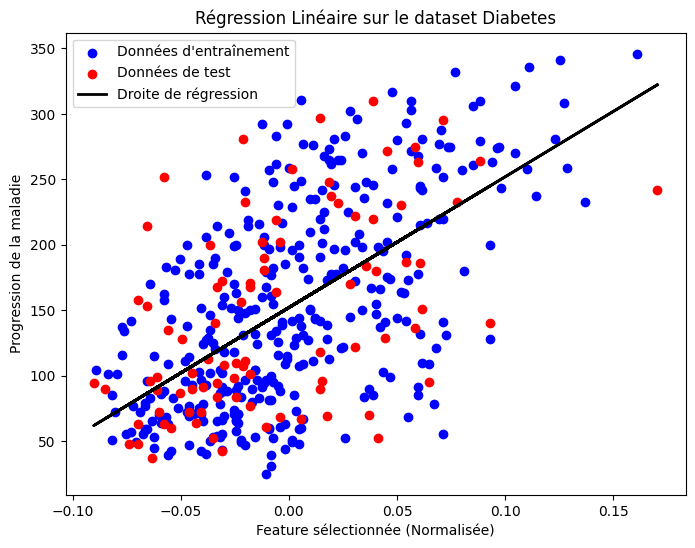

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Données d\'entraînement')
plt.scatter(X_test, y_test, color='red', label='Données de test')
plt.plot(X_test, y_pred, color='black', linewidth=2, label='Droite de régression')
plt.xlabel('Feature sélectionnée (Normalisée)')
plt.ylabel('Progression de la maladie')
plt.title('Régression Linéaire sur le dataset Diabetes')
plt.legend()
plt.show()